<div style="text-align: justify">
<font size=6><br><h2 align="center">Simulación de Cuerpos Celestes de Gran
Masa en el Sistema Solar</h2></font>
<font size=5><br>
<h3 align="center">Simulación Digital</h3></font><font size=5>
<h3 align="center">Proyecto Final</h3></font> 
    
<br/>

<font size=5><h4 align="left">Intregrantes: </h4></font>      
2172016 - Kevin Javier Lozano Galvis<br>
2170688 - Brayan Rodolfo Barajas Ochoa<br>
2161342 - Carlos Alberto Palencia Pombo<br>

# Instalación astroquery

Se hace uso de la librería astroquery para poder obtener los módulos a utilizar

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 4.7MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 3.2MB 42.4MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp37-none-any.whl size=3831874 sha256=637fab7ab67c8c210be4c2b55f4643b72ba733a08814d77fc39110a36f31a78f
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


# Primer Modelo

Al tener instalada la librería, se usará el modulo Horizons para la extracción de los datos de la NASA

In [4]:
import numpy as np
import json
from astropy.time import Time
from astroquery.jplhorizons import Horizons

#Se simula comenzando desde esta fecha
sim_start_date = "2018-01-01"    

#Se comenzará simulando el primer modelo solo con los planetas cercanos al Sol para observar mejor su comportamiento
names = ['Mercury', 'Venus', 'Earth', 'Mars']
sizes = [0.5, 1.0, 1.1, 0.6]
nasaids = [1, 2, 3, 4] 

data = dict(info="Solar planets database, including positions and velocities at the given date",
            date=sim_start_date)
for i in range(len(nasaids)):
    nasaid = nasaids[i]
    obj = Horizons(id=nasaid, location="@sun", epochs=Time(sim_start_date).jd, id_type='id').vectors()
    data[str(nasaid)] = {
        "name": names[i],
        "size": sizes[i],
        "r": [np.double(obj[xi]) for xi in ['x', 'y', 'z']],
        "v": [np.double(obj[vxi]) for vxi in ['vx', 'vy', 'vz']]
    }

with open("planets.json", 'w') as f:
    json.dump(data, f, indent=10)

Primero, se hará la simulación con los planetas cercanos al Sol, para observar mejor su comportamiento

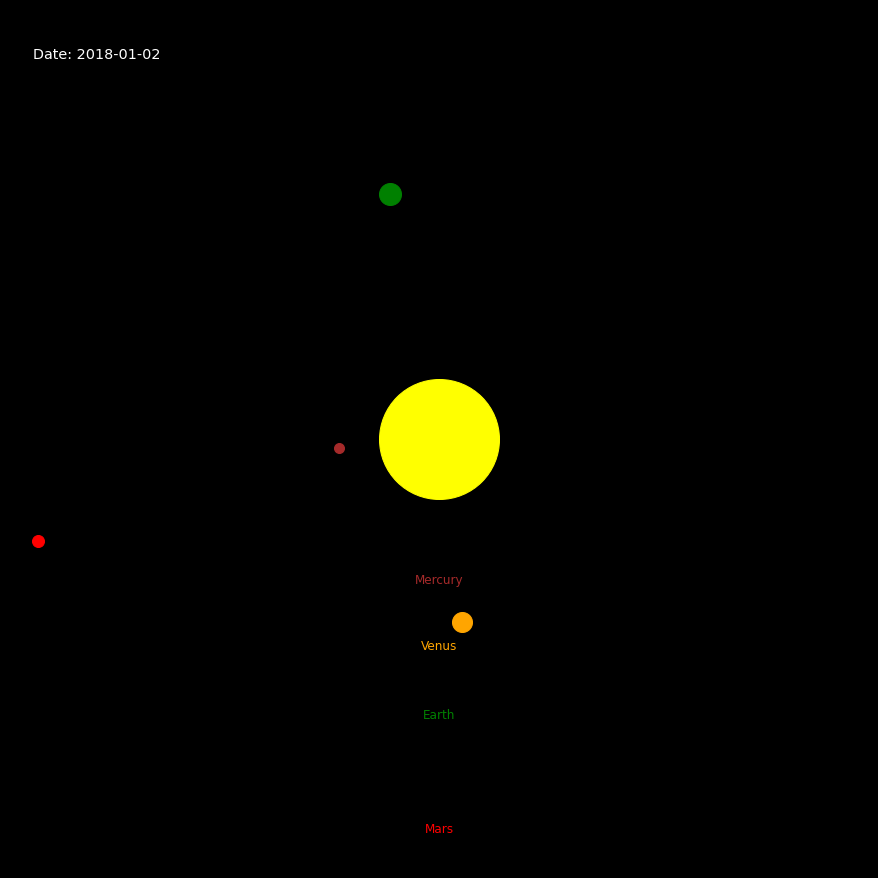

In [6]:
import json
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import date, datetime, timedelta

#Se hace la simulación para 3 años
sim_duration = 3 * 365           

#Se definen los objetos: el Sol, Mercurio, Venus, la Tierra, etc.
class Object:              
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self): 
        dt = 1
        self.time += timedelta(dt)
        plots = []
        lines = []
        for i, p in enumerate(self.planets):
            p.r += p.v * dt
            # En unidades de AU/día^2
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            plots.append(p.plot)
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            lines.append(p.line)
        if len(p.xs) > 10000:
            raise SystemExit("Stopping after a long run to prevent memory overflow")
        self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[12, 12])
ax = plt.axes([0., 0., 1., 1.], xlim=(-1.7, 1.7), ylim=(-1.7, 1.7))
ax.set_aspect('equal')
ax.axis('off')
with open("planets.json", 'r') as f:
    planets = json.load(f)
ss = SolarSystem(Object("S", 120, 'yellow', [0, 0, 0], [0, 0, 0]))
ss.time = datetime.strptime(planets["date"], '%Y-%m-%d').date()
nasaids = [1, 2, 3, 4] 
colors = ['brown', 'orange', 'green', 'red']
texty = [.47, .73, 1, 1.45]
for i, nasaid in enumerate(nasaids):
    planet = planets[str(nasaid)]
    ss.add_planet(Object(nasaid, 20*planet["size"], colors[i], planet["r"], planet["v"]))
    ax.text(0, - (texty[i] + 0.1), planet["name"], color=colors[i],
            zorder=1000, ha='center', fontsize='large')

def animate(i):
    return ss.evolve()

ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()
ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)

Ahora, que ya se observaron los planetas cercanos al Sol, se procede a realizar el primer modelo con todos los planetas

In [7]:
#Se simula comenzando desde esta fecha
sim_start_date = "2018-01-01"   

#Planetas
names = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
sizes = [0.09, 0.18, 0.2, 0.108, 2.25, 1.8, 0.82, 1.6]
nasaids = [1, 2, 3, 4, 5, 6, 7, 8]  

data = dict(info="Solar planets database, including positions and velocities at the given date",
            date=sim_start_date)
for i in range(len(nasaids)):
    nasaid = nasaids[i]
    obj = Horizons(id=nasaid, location="@sun", epochs=Time(sim_start_date).jd, id_type='id').vectors()
    data[str(nasaid)] = {
        "name": names[i],
        "size": sizes[i],
        "r": [np.double(obj[xi]) for xi in ['x', 'y', 'z']],
        "v": [np.double(obj[vxi]) for vxi in ['vx', 'vy', 'vz']]
    }

with open("planets.json", 'w') as f:
    json.dump(data, f, indent=10)

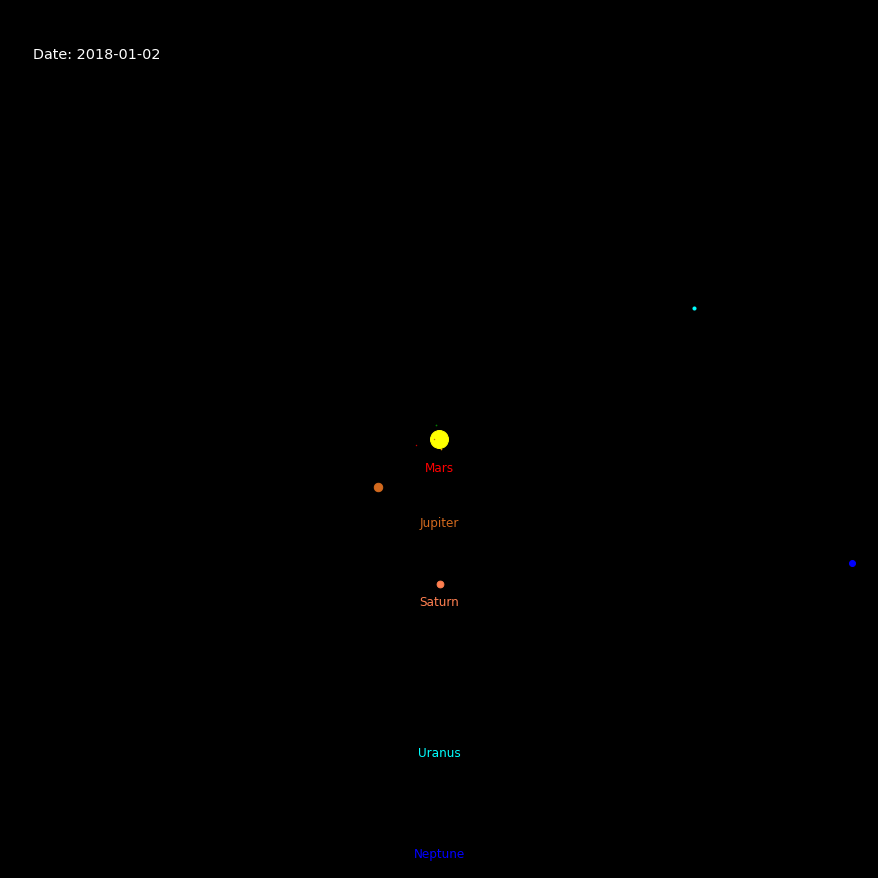

In [8]:
#Se hace la simulación para 3 años
sim_duration = 3 * 365           

#Se definen los objetos: el Sol, Mercurio, Venus, la Tierra, etc.  

class Object:           
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self): 
        dt = 1
        self.time += timedelta(dt)
        plots = []
        lines = []
        for i, p in enumerate(self.planets):
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            plots.append(p.plot)
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            lines.append(p.line)
        if len(p.xs) > 10000:
            raise SystemExit("Stopping after a long run to prevent memory overflow")
        self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[12, 12])
ax = plt.axes([0., 0., 1., 1.], xlim=(-30, 30), ylim=(-30, 30))
ax.set_aspect('equal')
ax.axis('off')
with open("planets.json", 'r') as f:
    planets = json.load(f)
ss = SolarSystem(Object("S",18, 'yellow', [0, 0, 0], [0, 0, 0]))
ss.time = datetime.strptime(planets["date"], '%Y-%m-%d').date()
nasaids = [1, 2, 3, 4, 5, 6, 7, 8]  

colors = ['brown', 'orange', 'green', 'red', 'chocolate', 'coral', 'cyan', 'blue']
texty = [.47, .73, 1.0, 2.2, 6.0, 11.5, 22.0, 29.0]
for i, nasaid in enumerate(nasaids):
    planet = planets[str(nasaid)]
    ss.add_planet(Object(nasaid,3.75 * planet["size"], colors[i], planet["r"], planet["v"]))
    if i>=3:
      ax.text(0, - (texty[i] + 0.1), planet["name"], color=colors[i],
              zorder=1000, ha='center', fontsize='large')

def animate(i):
    return ss.evolve()

ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()
ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)

# Segundo Modelo

Para este modelo se comenzarán graficando los planetas cercanos al Sol. Sin embargo, es importante obtener la información de los 8 planetas porque el segundo modelo calcula la aceleración a partir de la interacción de cada cuerpo con el resto de ellos en el sistema solar. 

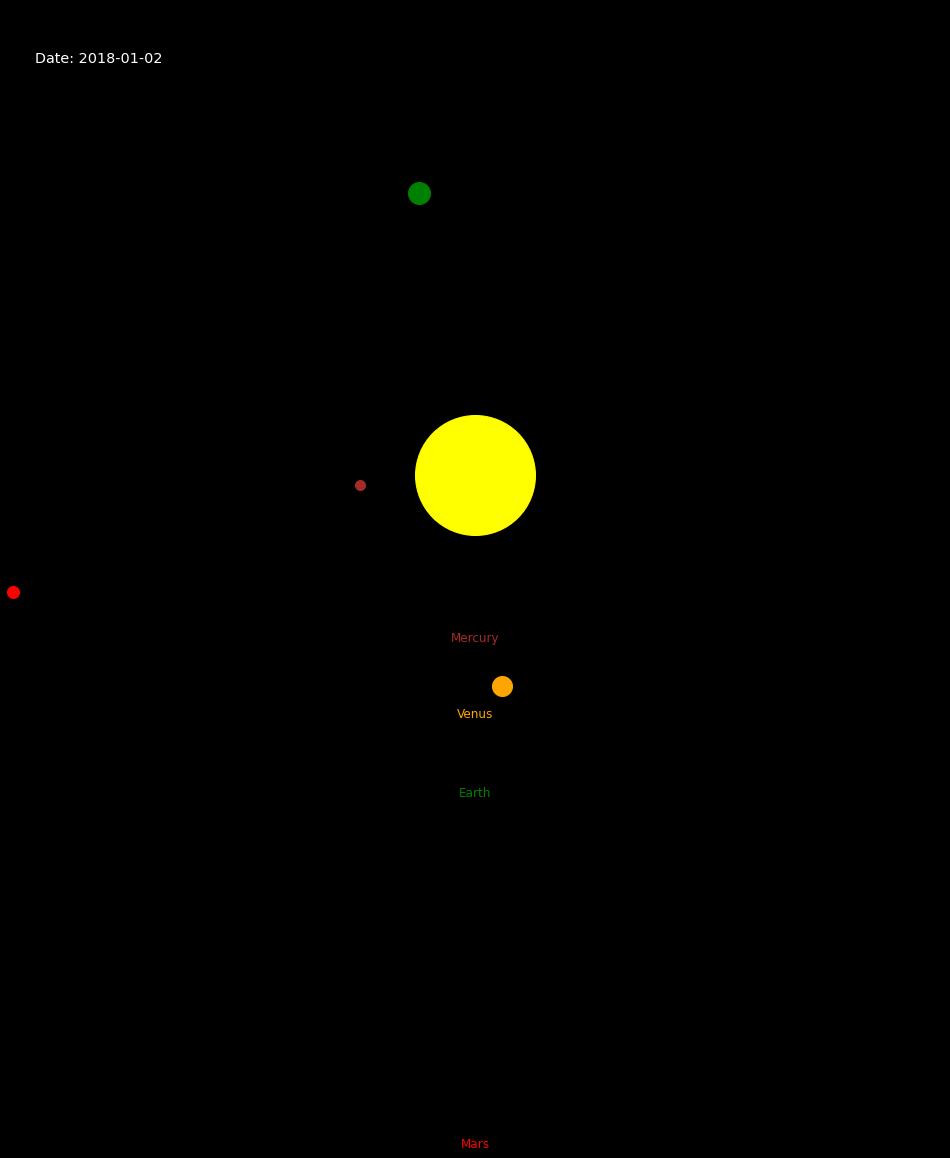

In [9]:
#Se hace la simulación para 3 años
sim_duration = 3 * 365        
G = 1.4878e-34
mass_sun=1.9891e30
mass_planets=[3.3022e23,4.8685e24,5.9736e24,6.4185e23,1.8986e27,5.6846e26,8.6810e25,10.243e25]
planet_sizes = [0.5, 1.0, 1.1, 0.6,10,9,7,8]

class Object:                 
    def __init__(self, name,mass, rad, color, r, v):
        self.name = name
        self.mass = mass
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self):
        dt = 1
        self.time += timedelta(dt)
        plots=[]
        lines=[]
        for i, p in enumerate(self.planets):
            p.r += p.v * dt
            forces = np.array((0, 0, 0))
            dr = p.r-self.thesun.r
            distance = np.sum(dr**2)**(3./2)
            forces = self.thesun.mass* dr / distance

            for j, p2 in enumerate(self.planets):
              if i==j:
                continue
              dr =p.r-p2.r
              distance = np.sum(dr**2)**(3./2)
              forces += p2.mass* dr / distance

            acc = -G*forces  
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            plots.append(p.plot)
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            lines.append(p.line)
        if len(p.xs) > 10000:
            raise SystemExit("Stopping after a long run to prevent memory overflow")
        self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[13, 13])
ax = plt.axes([0., 0., 1., 1.], xlim=(-1.6, 1.6), ylim=(-1.6, 1.6))
ax.set_aspect('equal')
ax.axis('off')
with open("planets.json", 'r') as f:
    planets = json.load(f)
ss = SolarSystem(Object("S",mass_sun, 120, 'yellow', [0, 0, 0], [0, 0, 0]))
ss.time = datetime.strptime(planets["date"], '%Y-%m-%d').date()
nasaids = [1, 2, 3, 4,5,6,7,8] 

colors = ['brown', 'orange', 'green', 'red', 'chocolate', 'coral', 'cyan', 'blue']
texty = [.47, .73, 1.0, 2.2, 6.0, 11.5, 22.0, 29.0]
for i, nasaid in enumerate(nasaids):
    planet = planets[str(nasaid)]
    if i<=3:
      ss.add_planet(Object(nasaid, mass_planets[i], 20*planet_sizes[i], colors[i], planet["r"], planet["v"]))
      ax.text(0, - (texty[i] + 0.1), planet["name"], color=colors[i],
              zorder=1000, ha='center', fontsize='large')

def animate(i):
    return ss.evolve()

ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()
ani.save('solar_system_6in_150dpi-inner2.mp4', fps=60, dpi=150)

Ya al tener la simulación de los planetas cercanos al Sol para poder verificar y observar su comportamiento, se procede a realizar la implementación de todos los planetas para el modelo 2

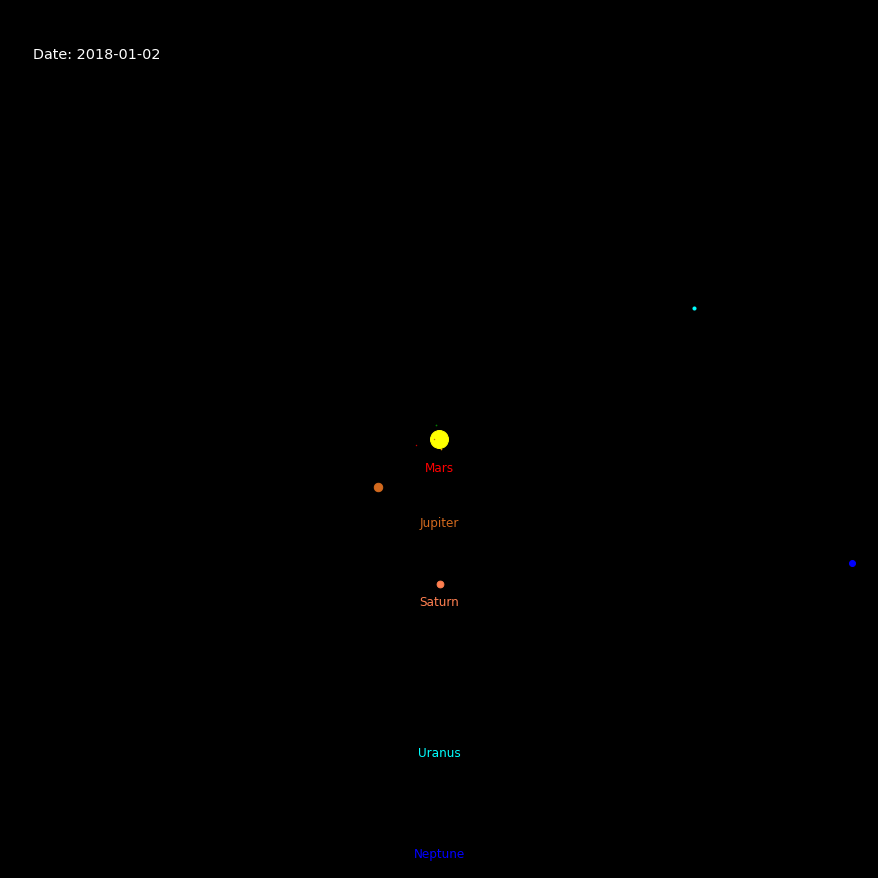

In [10]:
#Se hace la simulación para 3 años
sim_duration = 3 * 365              
G = 1.4878e-34
mass_sun=1.9891e30
mass_planets=[3.3022e23,4.8685e24,5.9736e24,6.4185e23,1.8986e27,5.6846e26,8.6810e25,10.243e25]
planet_sizes = [0.09, 0.18, 0.2, 0.108, 2.25, 1.8, 0.82, 1.6]
class Object:                  
    def __init__(self, name,mass, rad, color, r, v):
        self.name = name
        self.mass = mass
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self):
        dt = 1
        self.time += timedelta(dt)
        plots=[]
        lines=[]
        for i, p in enumerate(self.planets):
            p.r += p.v * dt
            forces = np.array((0, 0, 0))
            dr = p.r-self.thesun.r
            distance = np.sum(dr**2)**(3./2)
            forces = self.thesun.mass* dr / distance

            for j, p2 in enumerate(self.planets):
              if i==j:
                continue
              dr =p.r-p2.r
              distance = np.sum(dr**2)**(3./2)
              forces += p2.mass* dr / distance

            acc = -G*forces  
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            plots.append(p.plot)
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            lines.append(p.line)
        if len(p.xs) > 10000:
            raise SystemExit("Stopping after a long run to prevent memory overflow")
        self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[12, 12])
ax = plt.axes([0., 0., 1., 1.], xlim=(-30, 30), ylim=(-30, 30))
ax.set_aspect('equal')
ax.axis('off')
with open("planets.json", 'r') as f:
    planets = json.load(f)
ss = SolarSystem(Object("S",mass_sun, 18, 'yellow', [0, 0, 0], [0, 0, 0]))
ss.time = datetime.strptime(planets["date"], '%Y-%m-%d').date()
nasaids = [1, 2, 3, 4,5,6,7,8]  

colors = ['brown', 'orange', 'green', 'red', 'chocolate', 'coral', 'cyan', 'blue']
texty = [.47, .73, 1.0, 2.2, 6.0, 11.5, 22.0, 29.0]
for i, nasaid in enumerate(nasaids):
    planet = planets[str(nasaid)]
    ss.add_planet(Object(nasaid, mass_planets[i], 3.75*planet_sizes[i], colors[i], planet["r"], planet["v"]))
    if i>=3:
      ax.text(0, - (texty[i] + 0.1), planet["name"], color=colors[i],
              zorder=1000, ha='center', fontsize='large')

def animate(i):
    return ss.evolve()

ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()
ani.save('solar_system_6in_150dpi-outer2.mp4', fps=60, dpi=150)